In [3]:
import json

In [5]:
def load_json(fp):
    with open(fp) as f:
        data = json.load(f)
    return data

In [22]:
hip_indomain_fp = '../metadata/hip_indomain.json'
hip_indomain = load_json(hip_indomain_fp)

hip_outdomain_kits_fp = '../metadata/hip_outdomain_kits.json'
hip_outdomain_kits = load_json(hip_outdomain_kits_fp)

hip_outdomain_clinic_fp = '../metadata/hip_outdomain_clinic.json'
hip_outdomain_clinic = load_json(hip_outdomain_clinic_fp)

hip_outdomain_clinic_metal_fp = '../metadata/hip_outdomain_clinic_metal.json'
hip_outdomain_clinic_metal = load_json(hip_outdomain_clinic_metal_fp)

In [23]:
hip_outdomain_kits, hip_outdomain_clinic, hip_outdomain_clinic_metal, hip_indomain

({'UNETR': 0.7581818181818182,
  'AttentionUnet': 0.7863636363636363,
  'UNet': 0.7793181818181819,
  'MultiScale2DPermuteConcat': 0.7347727272727272,
  'TwoDPermuteConcat': 0.7952272727272726,
  'OneDConcat': 0.6038636363636365},
 {'UNETR': 0.7240776699029128,
  'AttentionUnet': 0.7522330097087377,
  'UNet': 0.739611650485437,
  'MultiScale2DPermuteConcat': 0.7382524271844659,
  'TwoDPermuteConcat': 0.7549514563106796,
  'OneDConcat': 0.6552427184466018},
 {'UNETR': 0.6978571428571428,
  'AttentionUnet': 0.7214285714285714,
  'UNet': 0.7264285714285714,
  'MultiScale2DPermuteConcat': 0.6878571428571431,
  'TwoDPermuteConcat': 0.6992857142857142,
  'OneDConcat': 0.6735714285714286},
 {'UNETR': 0.8226865671641791,
  'AttentionUnet': 0.8553731343283583,
  'UNet': 0.8446268656716418,
  'MultiScale2DPermuteConcat': 0.8447761194029852,
  'TwoDPermuteConcat': 0.8474626865671642,
  'OneDConcat': 0.7885074626865671,
  'TLPredictor': 0.7231578947368421})

In [13]:
KEYS = [
    'UNETR',
    'AttentionUnet',
    'UNet',
    'MultiScale2DPermuteConcat',
    'TwoDPermuteConcat',
    'OneDConcat',
]

In [14]:
import matplotlib.pyplot as plt
import scienceplots
import tueplots
from tueplots import figsizes, fontsizes
plt.style.use(['science','no-latex'])

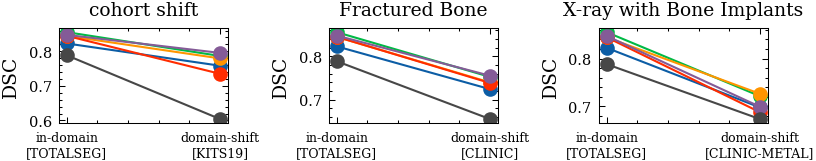

In [28]:
# Increase the resolution of all the plots below
plt.rcParams.update({"figure.dpi": 150})
plt.rcParams.update(figsizes.neurips2021(nrows=1, ncols=3))
plt.rcParams.update(fontsizes.neurips2021())


fig, ax = plt.subplots(1,3)
for model in KEYS:
    ax[0].plot(range(1,3),[hip_indomain[model],hip_outdomain_kits[model]],'-o',label=model)
ax[0].set_xticks(range(1,3),['in-domain\n[TOTALSEG]','domain-shift\n[KITS19]'], fontsize=6)
ax[0].set_ylabel('DSC')
ax[0].set_title('cohort shift')

for model in KEYS:
    ax[1].plot(range(1,3),[hip_indomain[model],hip_outdomain_clinic[model]],'-o',label=model)
ax[1].set_xticks(range(1,3),['in-domain\n[TOTALSEG]','domain-shift\n[CLINIC]'], fontsize=6)
ax[1].set_ylabel('DSC')
ax[1].set_title('Fractured Bone')

for model in KEYS:
    ax[2].plot(range(1,3),[hip_indomain[model],hip_outdomain_clinic_metal[model]],'-o',label=model)
ax[2].set_xticks(range(1,3),['in-domain\n[TOTALSEG]','domain-shift\n[CLINIC-METAL]'], fontsize=6)
ax[2].set_ylabel('DSC')
ax[2].set_title('X-ray with Bone Implants')
plt.savefig('domain_shift.pdf')